In [16]:
import pandas as pd

In [17]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [18]:
df1 = pd.read_csv("sarpy_rules_all_classes.txt", sep='\t')
df1 = df1[df1["Target"]=="ACTIVE"].reset_index(drop=True)
df1

,SMARTS,Target,Training LR
0,C=CCCC(=O),ACTIVE,inf
1,Nc4ccccc4F,ACTIVE,inf
2,CCOCCC[NH+](C)C,ACTIVE,inf
3,C(CCCCCC(O)CCC)C(=O),ACTIVE,inf
4,CC[NH+](CC(=O)[O-])CCNC,ACTIVE,inf
...,...,...,...
71,N(C)C,ACTIVE,1.21
72,c1ccc(N)cc1,ACTIVE,1.44
73,CCc1ccccc1,ACTIVE,1.39
74,CC,ACTIVE,1.05


In [19]:
df2 = pd.read_csv("sarpy_rules_active_class.txt", sep='\t')
df2

,SMARTS,Target,Training LR
0,C=CCCC(=O),ACTIVE,inf
1,Nc4ccccc4F,ACTIVE,inf
2,CCOCCC[NH+](C)C,ACTIVE,inf
3,C(CCCCCC(O)CCC)C(=O),ACTIVE,inf
4,CC[NH+](CC(=O)[O-])CCNC,ACTIVE,inf
...,...,...,...
76,CCN(CC),ACTIVE,1.23
77,CCc1ccccc1,ACTIVE,1.39
78,CC(C)C,ACTIVE,1.14
79,CC,ACTIVE,1.05


In [20]:
df = pd.concat([df1[["SMARTS"]],df2[["SMARTS"]]]).drop_duplicates().reset_index(drop=True)
df

,SMARTS
0,C=CCCC(=O)
1,Nc4ccccc4F
2,CCOCCC[NH+](C)C
3,C(CCCCCC(O)CCC)C(=O)
4,CC[NH+](CC(=O)[O-])CCNC
...,...
123,CNCCCO
124,CCCCCCCC
125,NCCN
126,CCN(CC)


In [21]:
SMARTS  = df.SMARTS.to_list()
SMARTS

['C=CCCC(=O)',
 'Nc4ccccc4F',
 'CCOCCC[NH+](C)C',
 'C(CCCCCC(O)CCC)C(=O)',
 'CC[NH+](CC(=O)[O-])CCNC',
 'CC(C)(O)c1ccccc1',
 'C[NH+](C)CCc1c[nH]c2ccccc12',
 'CNc3cccc(C(F)(F)F)c3',
 'Oc1ccccc1OCC(O)C',
 'O=C(Nc1ccc(O)cc1)',
 'c3cccc(Cl)c3Cl',
 'C(=O)C(c1ccccc1)c1ccccc1',
 'CCC[NH+](C)C(C(=O)[O-])',
 'CC(C[N+](C)(C))OC',
 'Oc1cccc(C(O)C)c1',
 'CCNCCOc1ccccc1',
 'NS(=O)(=O)c1ccccc1Cl',
 'CCC#N',
 'c2cc(C)nn2',
 'Oc1ccc(CO)cc1',
 'CC(C)(C)NC(=O)',
 'O=C(C)C(O)CC',
 'CCCCC[NH+](C)CCCC',
 'c2ccc(F)cc2F',
 'CCC(C)(C)COC',
 'C(CNC)c3ccc([O-])cc3',
 'CCC[NH+]2CCNCC2',
 'Cc1ccccc1OCC(C)',
 'c1cccc(Nc2ccccc2)c1C',
 'c1ccc2c(c1)cc(C)n2',
 'CCOCC[N+](C)(C)',
 'CC[NH+](CC)CCc1ccccc1',
 'C[NH+](C)CCOC(c1ccccc1)',
 'COCCc1ccccc1',
 'Oc1cc(C(=O))ccc1',
 'Cc1ccc(CNC(C))cc1',
 'c3ccc(C(=O)NC(CC))cc3',
 'CCCCCCCCN',
 'CCCC(CCC)C(=O)',
 'CCON',
 'c1cc(C)c(C=C)cc1',
 '[NH+]3CC[NH+](C)CC3',
 'CCCOc1ccc(C)cc1',
 'C(CC[NH+](C(C))C)c2ccccc2',
 'n2cccn2',
 'C(Cc1ccccc1)C(=O)[O-]',
 'OP(=O)(=O)O',
 '[N+]CC(C)O',

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

def check_criteria(smarts):
    # Convert SMARTS to molecule for analysis
    mol = Chem.MolFromSmarts(smarts)
    
    # If the molecule couldn't be created from the SMARTS, it's invalid
    if mol is None:
        return False
    
    # Check for small fragments
    if mol.GetNumAtoms() <= 4:
        return False
    
    # Check for ubiquitously occurring substructures like benzene
    benzene = Chem.MolFromSmiles('c1ccccc1')
    if mol.HasSubstructMatch(benzene):
        return False
    
    # Additional checks can be added here based on specific criteria

    return True


In [23]:
filtered_SMARTS = [s for s in SMARTS if check_criteria(s)]
filtered_SMARTS

['C=CCCC(=O)',
 'CCOCCC[NH+](C)C',
 'C(CCCCCC(O)CCC)C(=O)',
 'CC[NH+](CC(=O)[O-])CCNC',
 'CCC[NH+](C)C(C(=O)[O-])',
 'CC(C[N+](C)(C))OC',
 'c2cc(C)nn2',
 'CC(C)(C)NC(=O)',
 'O=C(C)C(O)CC',
 'CCCCC[NH+](C)CCCC',
 'CCC(C)(C)COC',
 'CCC[NH+]2CCNCC2',
 'CCOCC[N+](C)(C)',
 'CCCCCCCCN',
 'CCCC(CCC)C(=O)',
 '[NH+]3CC[NH+](C)CC3',
 'n2cccn2',
 'OP(=O)(=O)O',
 '[N+]CC(C)O',
 'CC=CCCCCO',
 'c1c[nH]cc1C',
 'CCCCC[NH+](C)C',
 'C(=NCCN)',
 'c2ccno2',
 'c1ccco1',
 'Cc1nccn1',
 'CNCCNCCNCC',
 'CCCCCCN',
 'CC(=O)NCCC',
 'NCCCO',
 'C[N+]CCO',
 'CC(C)[N+](C)',
 'Cn4ccnc4',
 'N(C)CCC',
 'c2cc[n-]n2',
 'C3CC(OCC)CC3',
 'C(=O)OCC[N+]',
 'N2CC[NH+](CCO)CC2',
 'Cn1cccn1',
 'CC1CC[NH+](C)CC1',
 'CCC[NH+]4CC[NH+]CC4',
 'CC(C)CC([NH+](C)C)',
 'c1c[nH]cc1',
 'COP(=O)(=O)O',
 'CCCOC(=O)N',
 'CCNC(=O)CCC(=O)',
 'CN(C)c1ccccn1',
 'OCCCC(=O)C',
 'CC(=CCCCCCCCCCCC)',
 'CCC[NH+](CCC)C',
 'C1C[N-]C[N-]C1',
 'c2cccn2',
 'CCCCCC(C)(C)C',
 'COCC[N+](C)(C)',
 'Cc1cncn1',
 'C[NH+](C)CCC',
 'CNCCCO',
 'CCCCCCCC',
 'CCN(CC)']

In [24]:
len(filtered_SMARTS)

59

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd


results = []

# Calculate occurrences and PPV
for smarts in filtered_SMARTS:
    mol_substructure = Chem.MolFromSmarts(smarts)
    
     # Here, the lambda function returns True (or 1) once if the molecule has the substructure, regardless of the number of occurrences
    occurrences = DICTrank['Standardized_SMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(mol_substructure)).sum()
    
    positive_cases = DICTrank[DICTrank['DICT _ Concern'] == 'most']['Standardized_SMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(mol_substructure)).sum()
    
    # Avoid division by zero error
    if occurrences == 0:
        ppv = 0
    else:
        ppv = positive_cases / occurrences

    results.append((smarts, occurrences, ppv))

# Filtering based on the criteria and store in a dataframe
filtered_results = [result for result in results if result[1] >= 5 and result[2] >= 0.5]
filtered_results_df = pd.DataFrame(filtered_results, columns=["Substructure", "Occurrences", "PPV"])

filtered_results_df



,Substructure,Occurrences,PPV
0,CCOCCC[NH+](C)C,20,0.55
1,CN(C)c1ccccn1,12,0.75


In [26]:
filtered_results_df.Substructure.to_list()

['CCOCCC[NH+](C)C', 'CN(C)c1ccccn1']

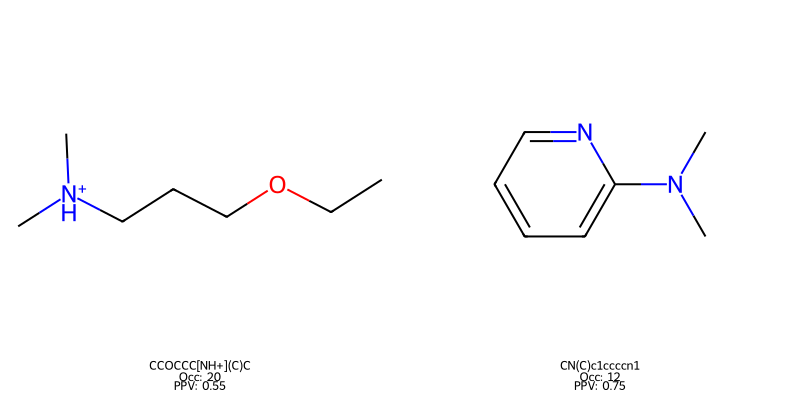

In [27]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert each SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(smiles) for smiles in filtered_results_df.Substructure.to_list()]
# Remove None values from mols
mols = [mol for mol in mols if mol is not None]

# Prepare legends (SMILES) for each molecule
legend1 = filtered_results_df.Substructure.to_list()
legend2 = filtered_results_df.Occurrences.to_list()
legend3= filtered_results_df.PPV.to_list()
combined_legends = [f"{l1}\nOcc: {l2}\nPPV: {l3:.2f}" for l1, l2, l3 in zip(legend1, legend2, legend3)]

#Display the molecules with SMILES on top
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400, 400), legends=combined_legends)
img


In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Load your dataset, assuming it's in a CSV format
import pandas as pd


results = []

# Calculate occurrences and PPV
for smarts in filtered_SMARTS:
    mol_substructure = Chem.MolFromSmarts(smarts)
    
     # Here, the lambda function returns True (or 1) once if the molecule has the substructure, regardless of the number of occurrences
    occurrences = DICTrank['Standardized_SMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(mol_substructure)).sum()
    
    positive_cases = DICTrank[DICTrank['DICTrank'] == 1]['Standardized_SMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(mol_substructure)).sum()
    
    # Avoid division by zero error
    if occurrences == 0:
        ppv = 0
    else:
        ppv = positive_cases / occurrences

    results.append((smarts, occurrences, ppv))

# Filtering based on the criteria and store in a dataframe
filtered_results = [result for result in results if result[1] >= 5 and result[2] >= 0.5]
filtered_results_df = pd.DataFrame(filtered_results, columns=["Substructure", "Occurrences", "PPV"])

filtered_results_df



,Substructure,Occurrences,PPV
0,C=CCCC(=O),23,1.000000
1,CCOCCC[NH+](C)C,20,1.000000
2,C(CCCCCC(O)CCC)C(=O),19,1.000000
3,CC[NH+](CC(=O)[O-])CCNC,13,1.000000
4,CCC[NH+](C)C(C(=O)[O-]),13,1.000000
5,CC(C[N+](C)(C))OC,10,1.000000
6,c2cc(C)nn2,11,0.818182
7,CC(C)(C)NC(=O),9,0.888889
8,O=C(C)C(O)CC,31,0.903226
9,CCCCC[NH+](C)CCCC,35,0.942857


In [29]:
filtered_results_df = filtered_results_df.sort_values("PPV", ascending=False)
filtered_results_df

,Substructure,Occurrences,PPV
0,C=CCCC(=O),23,1.000000
2,C(CCCCCC(O)CCC)C(=O),19,1.000000
3,CC[NH+](CC(=O)[O-])CCNC,13,1.000000
4,CCC[NH+](C)C(C(=O)[O-]),13,1.000000
5,CC(C[N+](C)(C))OC,10,1.000000
1,CCOCCC[NH+](C)C,20,1.000000
36,C(=O)OCC[N+],19,0.947368
20,c1c[nH]cc1C,53,0.943396
9,CCCCC[NH+](C)CCCC,35,0.942857
40,CCC[NH+]4CC[NH+]CC4,16,0.937500


In [30]:
filtered_results_df.Substructure.to_list()

['C=CCCC(=O)',
 'C(CCCCCC(O)CCC)C(=O)',
 'CC[NH+](CC(=O)[O-])CCNC',
 'CCC[NH+](C)C(C(=O)[O-])',
 'CC(C[N+](C)(C))OC',
 'CCOCCC[NH+](C)C',
 'C(=O)OCC[N+]',
 'c1c[nH]cc1C',
 'CCCCC[NH+](C)CCCC',
 'CCC[NH+]4CC[NH+]CC4',
 'C3CC(OCC)CC3',
 'N2CC[NH+](CCO)CC2',
 'c1c[nH]cc1',
 'c2ccno2',
 'O=C(C)C(O)CC',
 'CCOCC[N+](C)(C)',
 'COP(=O)(=O)O',
 'CC(C)CC([NH+](C)C)',
 'CCC[NH+](CCC)C',
 'c2cccn2',
 'CCC[NH+]2CCNCC2',
 'CC1CC[NH+](C)CC1',
 'c2cc[n-]n2',
 'CC(C)(C)NC(=O)',
 'CCNC(=O)CCC(=O)',
 'Cn1cccn1',
 'CC(=CCCCCCCCCCCC)',
 'c1ccco1',
 'CCCCC[NH+](C)C',
 'CC=CCCCCO',
 'CCC(C)(C)COC',
 '[NH+]3CC[NH+](C)CC3',
 'C[NH+](C)CCC',
 'n2cccn2',
 'COCC[N+](C)(C)',
 'CC(C)[N+](C)',
 'CCCOC(=O)N',
 'CN(C)c1ccccn1',
 'OP(=O)(=O)O',
 'Cc1nccn1',
 'CCCCCC(C)(C)C',
 'OCCCC(=O)C',
 'c2cc(C)nn2',
 'CCCC(CCC)C(=O)',
 'CCCCCCCCN',
 'CNCCNCCNCC',
 'Cc1cncn1',
 'CCN(CC)',
 'C(=NCCN)',
 'CNCCCO',
 'CCCCCCCC',
 '[N+]CC(C)O',
 'NCCCO',
 'N(C)CCC',
 'CC(=O)NCCC',
 'C[N+]CCO',
 'CCCCCCN',
 'Cn4ccnc4']

[18:35:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[18:35:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[18:35:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[18:35:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[18:35:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


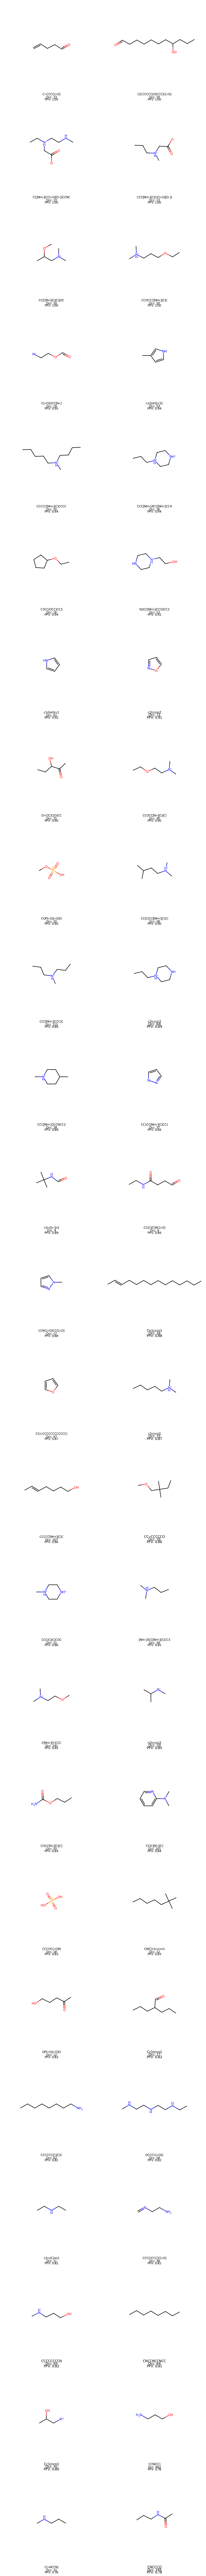

In [32]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert each SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(smiles) for smiles in filtered_results_df.Substructure.to_list()]
# Remove None values from mols
mols = [mol for mol in mols if mol is not None]

# Prepare legends (SMILES) for each molecule
legend1 = filtered_results_df.Substructure.to_list()
legend2 = filtered_results_df.Occurrences.to_list()
legend3= filtered_results_df.PPV.to_list()
combined_legends = [f"{l1}\n\nOcc: {l2}\n\nPPV: {l3:.2f}" for l1, l2, l3 in zip(legend1, legend2, legend3)]

#Display the molecules with SMILES on top
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400, 400), legends=combined_legends)
img
